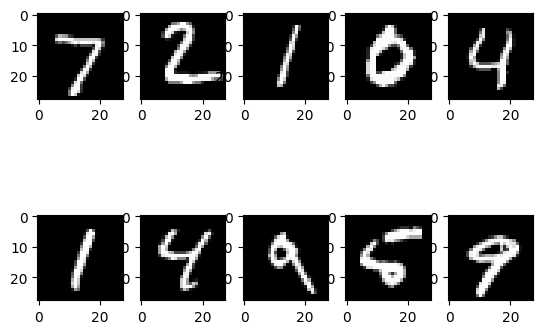

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()



In [5]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/5], Step [100/600], Loss: 0.2159
Epoch [1/5], Step [200/600], Loss: 0.2458
Epoch [1/5], Step [300/600], Loss: 0.2477
Epoch [1/5], Step [400/600], Loss: 0.1333
Epoch [1/5], Step [500/600], Loss: 0.1581
Epoch [1/5], Step [600/600], Loss: 0.1635
Epoch [2/5], Step [100/600], Loss: 0.1368
Epoch [2/5], Step [200/600], Loss: 0.0806
Epoch [2/5], Step [300/600], Loss: 0.1196
Epoch [2/5], Step [400/600], Loss: 0.0619
Epoch [2/5], Step [500/600], Loss: 0.0249
Epoch [2/5], Step [600/600], Loss: 0.1364
Epoch [3/5], Step [100/600], Loss: 0.0798
Epoch [3/5], Step [200/600], Loss: 0.1601
Epoch [3/5], Step [300/600], Loss: 0.0919
Epoch [3/5], Step [400/600], Loss: 0.1701
Epoch [3/5], Step [500/600], Loss: 0.0239
Epoch [3/5], Step [600/600], Loss: 0.0106
Epoch [4/5], Step [100/600], Loss: 0.0258
Epoch [4/5], Step [200/600], Loss: 0.0614
Epoch [4/5], Step [300/600], Loss: 0.0869
Epoch [4/5], Step [400/600], Loss: 0.0191
Epoch [4/5], Step [500/600], Loss: 0.0339
Epoch [4/5], Step [600/600], Loss: